In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

#libraries for data visualisation 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px

#set visualisation
%matplotlib inline
sns.set_style("whitegrid")

/kaggle/input/my-reading-log/reading log  rev 2.csv


In [2]:
df = pd.read_csv("/kaggle/input/my-reading-log/reading log  rev 2.csv")

In [3]:
df.head()

,completion date,Title,author(s),pages,review,rating,status,format,platform,publisher,Imprint,publication date,type,genre,language
0,04-06-21,The Bookish Life of Nina Hill,Abbi Waxman,352,y,5.0,Completed,Audiobook,Libby,Hachette Book,Headline Review,9-Jul-2019,Fiction,Realist Literature,eng
1,02-19-20,Twas The Nightshift Before Christmas,Adam Kay,160,y,4.0,Completed,Physical Book,NaN,Macmillan Publishers,Picador,13-Oct-2022,Nonfiction,Humour/ Satire,eng
2,09-19-18,This is Going to Hurt: Secret Diaries of a Jun...,Adam Kay,304,y,5.0,Completed,Physical Book,NaN,Macmillan Publishers,Picador,3-Feb-2022,Nonfiction,Humour/ Satire,eng
3,10-11-20,Poirot Investigates,Agatha Christie,224,y,1.5,Completed,Physical Book,NaN,HarperCollins,HarperCollins,24-Mar-2016,Fiction,Mystery,eng
4,10-10-20,Peril at End House,Agatha Christie,252,y,3.0,Completed,Physical Book,NaN,HarperCollins,HarperCollins,24-Sep-2015,Fiction,Mystery,eng


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   completion date   329 non-null    object 
 1   Title             391 non-null    object 
 2   author(s)         391 non-null    object 
 3   pages             391 non-null    int64  
 4   review            384 non-null    object 
 5   rating            345 non-null    float64
 6   status            391 non-null    object 
 7   format            391 non-null    object 
 8   platform          100 non-null    object 
 9   publisher         391 non-null    object 
 10  Imprint           391 non-null    object 
 11  publication date  391 non-null    object 
 12  type              391 non-null    object 
 13  genre             391 non-null    object 
 14  language          391 non-null    object 
dtypes: float64(1), int64(1), object(13)
memory usage: 45.9+ KB


In [5]:
#df.describe()

In [6]:
df['publication date'] = pd.to_datetime(df['publication date'])
df['publication_year'] = df['publication date'].dt.year
df['publication_month'] = df['publication date'].dt.month

df['completion date'] = pd.to_datetime(df['completion date'])
df['completion_year'] = df['completion date'].dt.year
df['completion_month'] = df['completion date'].dt.month

In [7]:
df["author(s)"]

0          Abbi Waxman
1             Adam Kay
2             Adam Kay
3      Agatha Christie
4      Agatha Christie
            ...       
386              香月 日輪
387              香月 日輪
388             高山 由紀子
389              鴨志田 一
390               三上 延
Name: author(s), Length: 391, dtype: object

In [8]:
df["review"].replace({"y": "yes", "n":"No"}, inplace = True)
df["review"]

0      yes
1      yes
2      yes
3      yes
4      yes
      ... 
386    yes
387    yes
388    yes
389    yes
390     No
Name: review, Length: 391, dtype: object

In [9]:
df["type"].nunique()

2

In [10]:
df["genre"].nunique()

36

In [11]:
df["genre"].unique()

array(['Realist Literature', 'Humour/ Satire', 'Mystery', 'Romance',
       'History', 'Bildungsroman', 'Fashion', 'Literary Fiction',
       'science', 'Business', 'Fantasy', 'Self Help', 'Data',
       'Contemporary', 'Psychology', 'Architectural History', 'Adventure',
       'Dystopian', 'Economics', 'Magical realism', 'Thriller',
       'Mathematics', 'Science Fiction', 'Law', 'Applied Physics',
       'Physical Chemistry', 'Biographies', 'Essays, Journals & Letters',
       'Horror', 'Humour Encyclopaedias', '仕事小説', 'Picture book', '経営書',
       'science fiction', 'Self-Esteem', '経済小説'], dtype=object)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 391 entries, 0 to 390
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   completion date    329 non-null    datetime64[ns]
 1   Title              391 non-null    object        
 2   author(s)          391 non-null    object        
 3   pages              391 non-null    int64         
 4   review             384 non-null    object        
 5   rating             345 non-null    float64       
 6   status             391 non-null    object        
 7   format             391 non-null    object        
 8   platform           100 non-null    object        
 9   publisher          391 non-null    object        
 10  Imprint            391 non-null    object        
 11  publication date   391 non-null    datetime64[ns]
 12  type               391 non-null    object        
 13  genre              391 non-null    object        
 14  language  

In [13]:
df["language"].unique()

array(['eng', 'jp'], dtype=object)

In [14]:
df["language"].replace({"jp": "Japanese", "eng":"English"}, inplace = True)
df["language"]

0       English
1       English
2       English
3       English
4       English
         ...   
386    Japanese
387    Japanese
388    Japanese
389    Japanese
390    Japanese
Name: language, Length: 391, dtype: object

# Status

<AxesSubplot:xlabel='status', ylabel='count'>

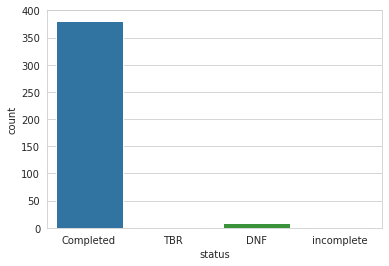

In [15]:
sns.countplot(x = "status", data = df)

In [16]:
DNF = df[df["status"]=="DNF"]
Completed = df[df["status"]=="Completed"]

In [17]:
sum(DNF["pages"])

2375

In [18]:
DNF["format"].value_counts()

Audiobook        7
Physical Book    1
Name: format, dtype: int64

In [19]:
if DNF["author(s)"].nunique() ==DNF.shape[0]:
    print("No duplicated authors")
else:
    print("there is an author you should avoid")

No duplicated authors


In [20]:
DNF["platform"].value_counts()

BorrowBox    3
Libby        2
Audible      2
Name: platform, dtype: int64

In [21]:
DNF["publisher"].nunique()

8

In [22]:
px.histogram(DNF, x = "publication_year", nbins=5)

In [23]:
px.histogram(DNF, x = "publication_month", nbins=5)

# completion date

In [24]:
Completed['completion date'] = pd.to_datetime(df['completion date'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [25]:
px.bar( Completed, x= "completion date", y = "pages")

In [26]:
Completed['Completion_year'] = Completed['completion date'].dt.year
Completed['Completion_month'] = Completed['completion date'].dt.month

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



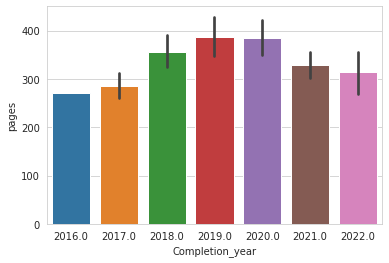

In [27]:
sns.barplot( x= "Completion_year", y = "pages", data = Completed)
plt.show()

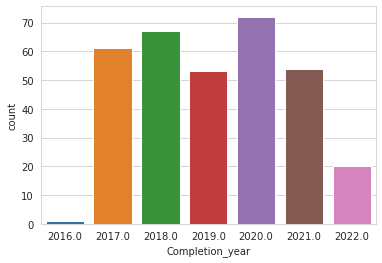

In [28]:
sns.countplot( x= "Completion_year",data = Completed)
plt.show()

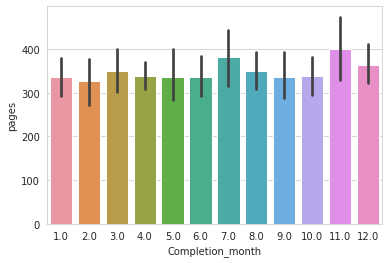

In [29]:
sns.barplot( x= "Completion_month", y = "pages", data = Completed)
plt.show()

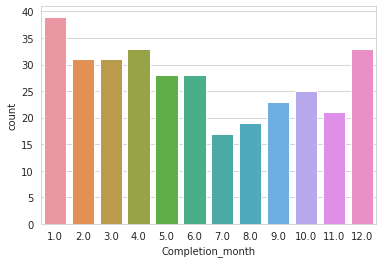

In [30]:
sns.countplot( x= "Completion_month", data = Completed)
plt.show()

# Title

In [31]:
rereads = df["Title"].value_counts().rename_axis ("titles").reset_index(name = "reads")
rereads[rereads["reads"]>1]

,titles,reads
0,Magpie Murders,2
1,陽気なギャングが地球を回す,2
2,世界から猫が消えたなら,2
3,ぼくは明日、昨日のきみとデートする,2
4,GIVER 復讐の贈与者,2
5,妖怪アパートの幽雅な日常 1,2
6,The Subtle Art of Not Giving a F*ck,2
7,The Alchemist,2
8,Freakonomics,2
9,Vicious,2


# author(s)

In [32]:
#read_books = df.dropna(subset = ["completion date"]).sort_values(by = "completion date")

first_reads = df.drop_duplicates(subset = "completion date", keep = "first")

In [33]:
first_reads.shape[0]

311

In [34]:
fav_authors = first_reads["author(s)"].value_counts().rename_axis ("author(s)").reset_index(name = "books/reads")
fav_authors[fav_authors["books/reads"]>1].head()

,author(s),books/reads
0,東野 圭吾,15
1,谷 瑞恵,13
2,香月 日輪,9
3,伊坂 幸太郎,6
4,池井戸 潤,5


In [35]:
px.bar(fav_authors[fav_authors["books/reads"]>2], x="author(s)", y = "books/reads" )

# pages

In [36]:
px.histogram(df, x = "pages", nbins=20)

<AxesSubplot:xlabel='review', ylabel='count'>

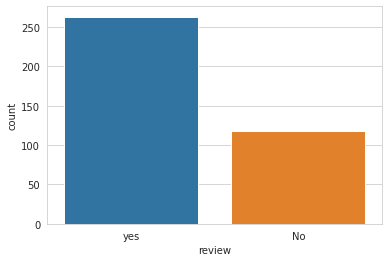

In [37]:
sns.countplot(x = "review", data = Completed)

In [38]:
print(round((Completed[Completed["review"]=="y"].shape[0]/Completed.dropna(subset = ["review"]).shape[0])*100, 1) ,"% of books read have been reviewed")

0.0 % of books read have been reviewed


In [39]:
px.histogram(Completed, x = "rating", nbins=5)

# Format

<AxesSubplot:xlabel='format', ylabel='count'>

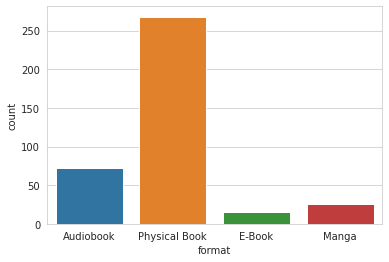

In [40]:
sns.countplot(x = "format", data = Completed)

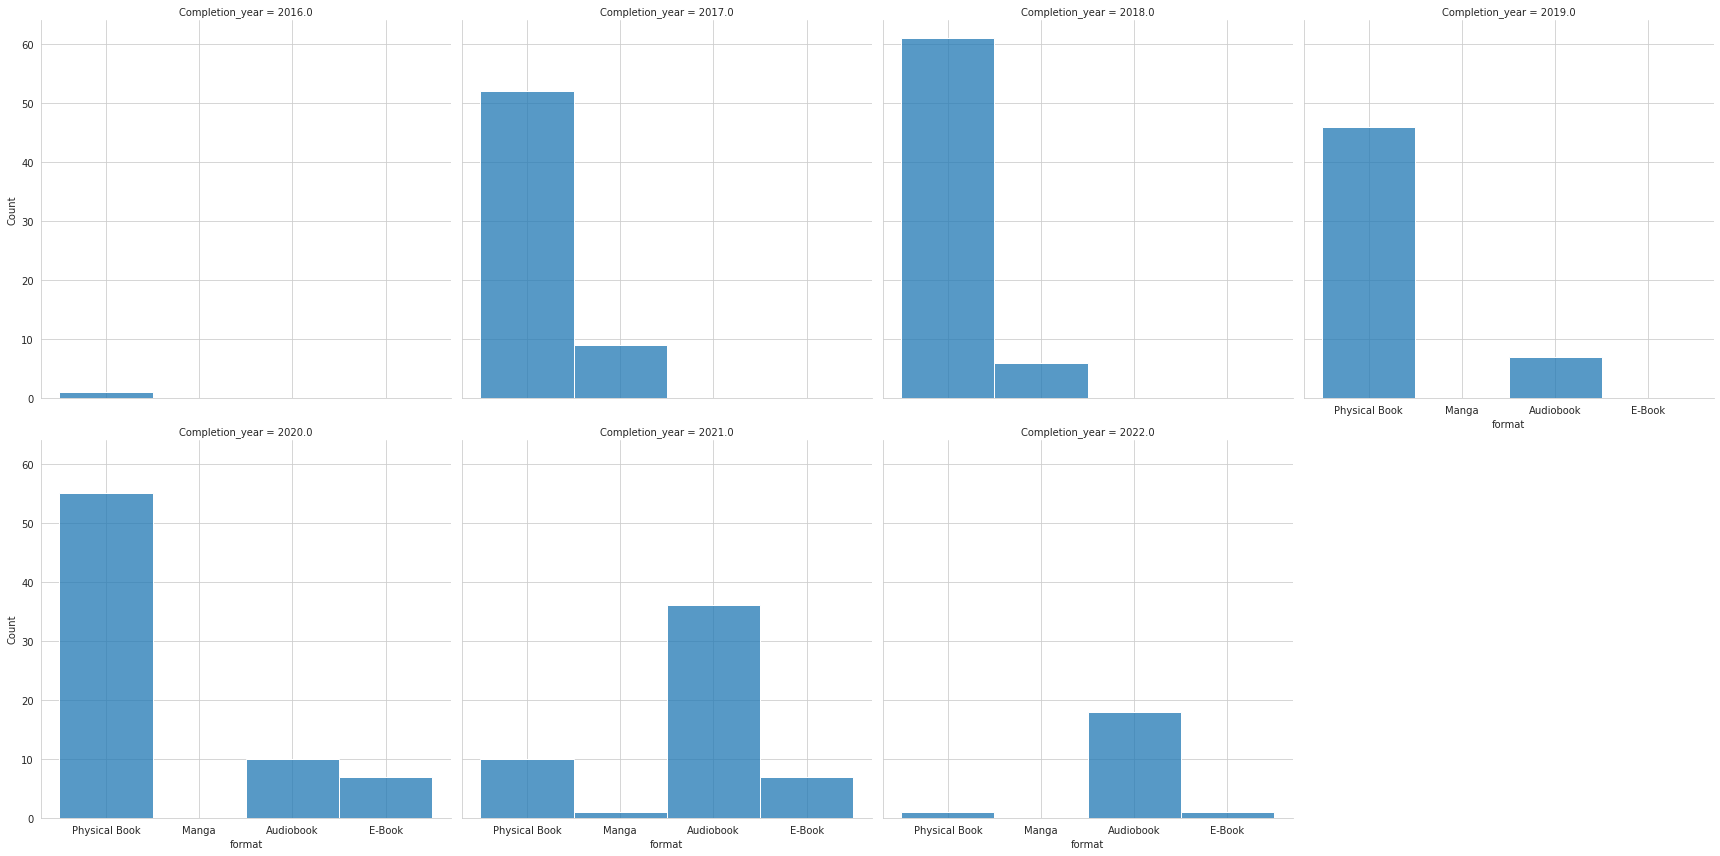

In [41]:
g = sns.FacetGrid(Completed, col='Completion_year', height=6, col_wrap=4)
g.map(sns.histplot, "format")
plt.show()

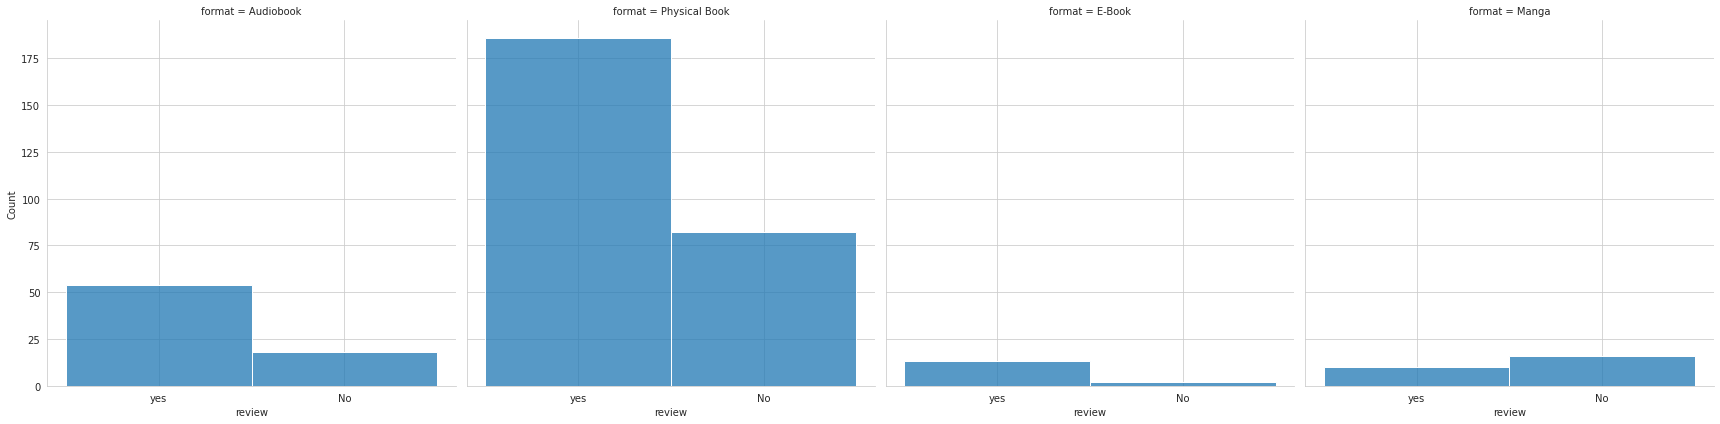

In [42]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=4)
g.map(sns.histplot, "review")
plt.show()

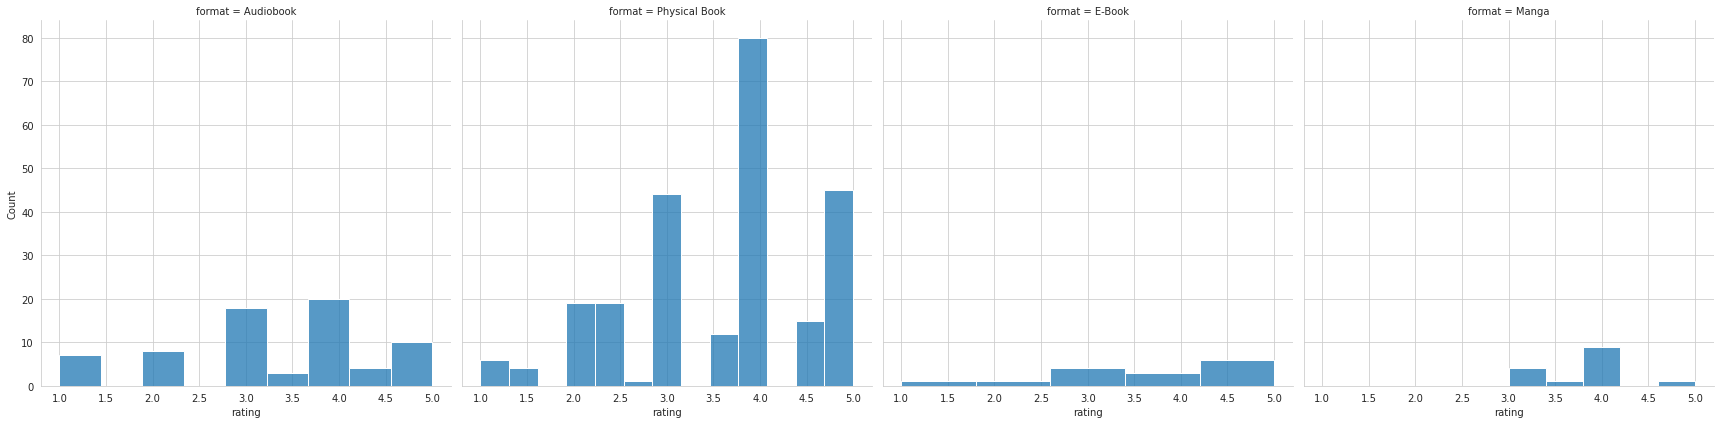

In [43]:
g = sns.FacetGrid(Completed, col='format', height=6, col_wrap=4)
g.map(sns.histplot, "rating")
plt.show()

<AxesSubplot:xlabel='platform', ylabel='count'>

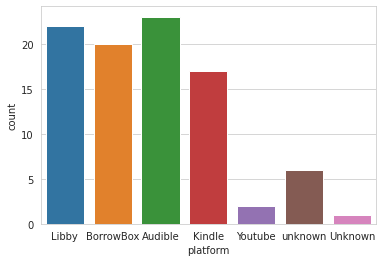

In [44]:
sns.countplot(x = "platform", data = Completed)

In [45]:
df["platform"].replace({"Youtube": "Unknown"}, inplace = True)

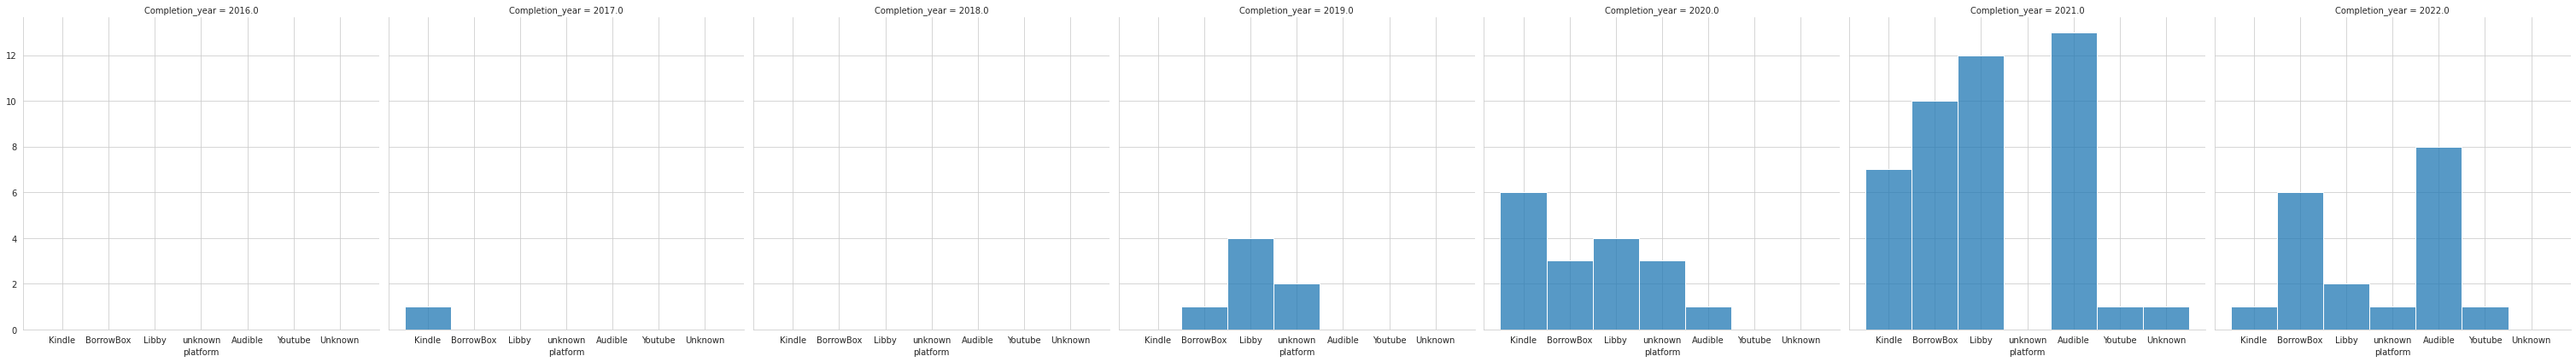

In [46]:
g = sns.FacetGrid(Completed, col='Completion_year', height=6)
g.map(sns.histplot, "platform")
plt.show()

In [47]:
publisher = first_reads["publisher"].value_counts().rename_axis ("publisher").reset_index(name = "books/reads")
publisher[publisher["books/reads"]>1].head(10)

,publisher,books/reads
0,KADOKAWA,52
1,Penguin,24
2,集英社,22
3,講談社,22
4,Penguin Random House,20
5,HarperCollins,17
6,Macmillan Publishers,17
7,Orion,13
8,文藝春秋,12
9,penguin,11


In [48]:
Imprint = first_reads["Imprint"].value_counts().rename_axis ("Imprint").reset_index(name = "books/reads")
Imprint[Imprint["books/reads"]>1].head(10)

,Imprint,books/reads
0,角川文庫,22
1,講談社文庫,19
2,コバルト文庫,14
3,Penguin Classics,13
4,Penguin,13
5,文春文庫,12
6,メディアワークス文庫,11
7,Picador,10
8,角川ホラー文庫,8
9,HarperCollins,7


In [49]:
#px.histogram(Completion, x = "publication_year", nbins=5)

In [50]:
px.histogram(df, x = "publication_year", nbins=5)

<AxesSubplot:xlabel='type', ylabel='count'>

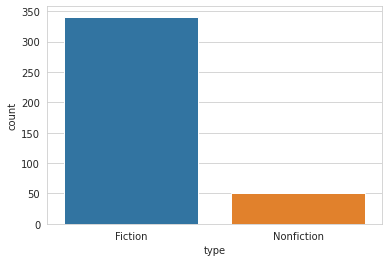

In [51]:
sns.countplot(x = "type", data = df)

<AxesSubplot:xlabel='language', ylabel='count'>

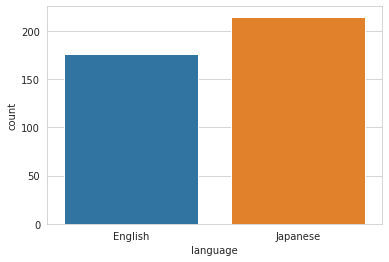

In [52]:
sns.countplot(x = "language", data = df)

In [53]:
px.histogram(df, x = "genre", color = "language")